In [51]:
#%%writefile Get_FastPulse.py
#import ROOT
import struct
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import scipy.stats as stats 
import numpy as np
import pandas as pd
from scipy.fftpack import fft,ifft
from scipy.optimize import curve_fit
from scipy.fft import fftshift
import csv

In [52]:
wavefile=r'E:\CDEX\ovbb\WaveSimulation\SAGE_PSS-master\SAGE_PSS-master\build\OutputFile\Waveform.csv'
trackfile=r'E:\CDEX\ovbb\WaveSimulation\SAGE_PSS-master\SAGE_PSS-master\build\OutputFile\Track.csv'
wave_count = len(open(wavefile,'r').readlines())
wave=np.zeros((wave_count,300))
with open(wavefile,'r',) as wavef:
    reader=wavef.readlines()
    count=0
    for line in reader:
        Line=line.split(",")
        for i in range(300):
            wave[count,i]=float(Line[i+3])
        count+=1


##############read track
class eventpath():
    def __init__(self,e_num,h_num):
        self.er=np.zeros((e_num,))
        self.ez=np.zeros((e_num,))
        self.hr=np.zeros((h_num,))
        self.hz=np.zeros((h_num,))

track=[]
track_count = len(open(trackfile,'r').readlines())

with open(trackfile,'r') as trackf:
    reader=trackf.readlines()
    count=0
    while(count<track_count):
        Line=reader[count].split(",")
        count+=1
        
        e_num=int(Line[0])
        h_num=int(Line[1])
        path=eventpath(e_num,h_num)
        
        for i in range(max(e_num,h_num)):
            
            Line=reader[count].split(",")
            count+=1
            
            if(i<e_num):
                path.er[i]=float(Line[1])
                path.ez[i]=float(Line[3])
            if(i<h_num):
                path.hr[i]=float(Line[6])
                path.hz[i]=float(Line[8])
        track.append(path)  

In [2]:
trackfile=r'E:\CDEX\ovbb\WaveSimulation\SimulatedEvents\alpha.dat'
##############read track
class eventpath():
    def __init__(self,e_num,h_num):
        self.er=np.zeros((e_num,))
        self.ez=np.zeros((e_num,))
        self.hr=np.zeros((h_num,))
        self.hz=np.zeros((h_num,))

track=[]
track_count = len(open(trackfile,'r').readlines())

with open(trackfile,'r') as trackf:
    reader=trackf.readlines()
    count=0
    while(count<track_count):
        Line=reader[count].split(" ")
        count+=1
        
        e_num=int(Line[0])
        h_num=int(Line[1])
        path=eventpath(e_num,h_num)
        
        for i in range(max(e_num,h_num)):
            
            Line=reader[count].split(" ")
            count+=1
            
            if(i<e_num):
                path.er[i]=float(Line[1])
                path.ez[i]=float(Line[3])
            if(i<h_num):
                path.hr[i]=float(Line[6])
                path.hz[i]=float(Line[8])
        track.append(path)  

ValueError: invalid literal for int() with base 10: ''

In [12]:

def f(t):
    if(t<375):
        return t/375
    else:
        return 1

def deconv(wave,f):
    w_length=wave.shape[1]
    
    Hf=fft(np.array(list(map(f,np.linspace(0,3000,w_length,endpoint=False)))))
    Raw_w=abs(ifft(fftshift(fft(wave)/Hf)))
    return Raw_w


In [53]:
print(wave[0,:])

[4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11
 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11
 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11
 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11
 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11
 4.68150e-11 4.68150e-11 4.68150e-11 4.68150e-11 6.23867e-11 2.52872e-09
 1.76938e-07 7.66301e-06 2.09824e-04 3.76249e-03 4.57719e-02 3.90347e-01
 2.38345e+00 1.03774e+01 3.19061e+01 7.28324e+01 1.34530e+02 2.09429e+02
 2.77515e+02 3.25247e+02 3.55408e+02 3.75071e+02 3.89063e+02 3.99976e+02
 4.09135e+02 4.17197e+02 4.24439e+02 4.30928e+02 4.36640e+02 4.41566e+02
 4.45774e+02 4.49402e+02 4.52611e+02 4.55530e+02 4.58241e+02 4.60785e+02
 4.63183e+02 4.65450e+02 4.67595e+02 4.69628e+02 4.71554e+02 4.73382e+02
 4.75118e+02 4.76765e+02 4.78330e+02 4.79817e+02 4.81231e+02 4.82577e+02
 4.83859e+02 4.85081e+02 4.86247e+02 4.87360e+02 4.

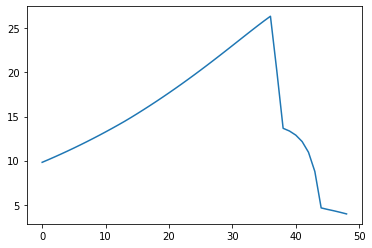

In [15]:
Raww=deconv(wave,f)
plt.plot(Raww[0,1:50])

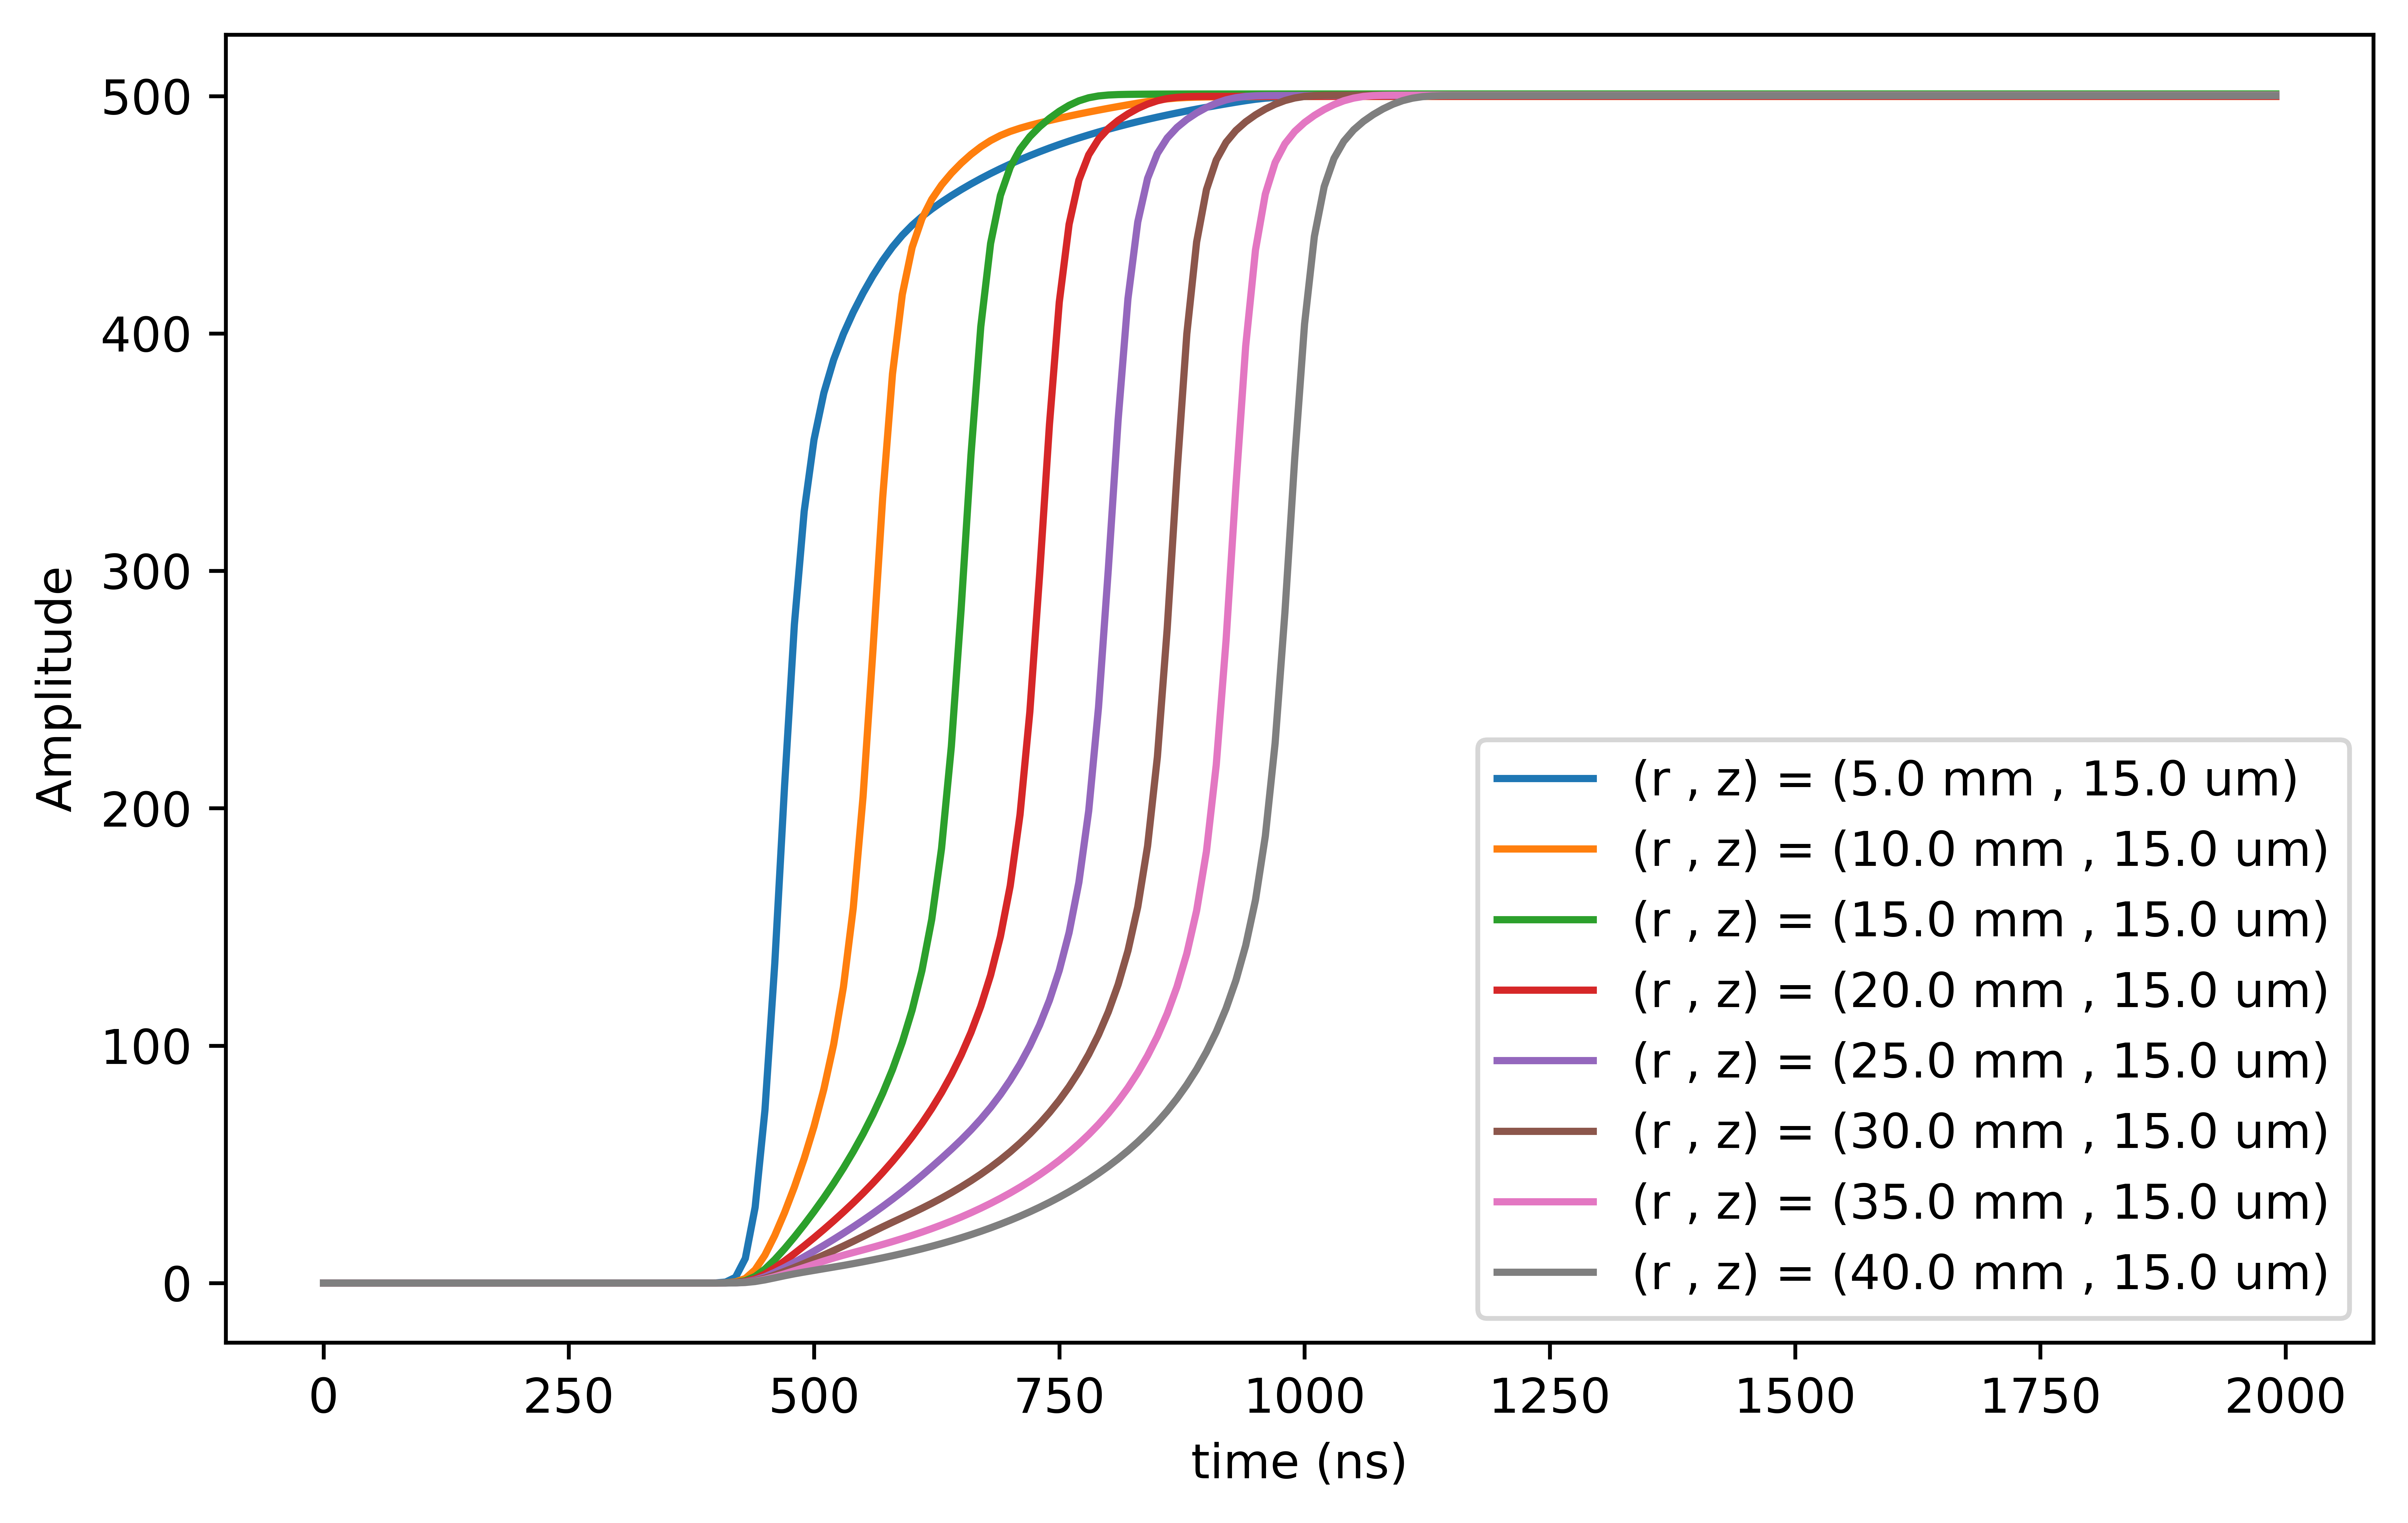

In [67]:
fig, ax = plt.subplots(1,1,figsize=(8,5),dpi=1200)
t=np.linspace(0,2990,300)
x=np.linspace(5,40,8)
y=np.zeros((8,))+0.005



for i in range(8,16):
    ###########pulse
    ax.plot(t[0:200],wave[i,0:200],label="(r , z) = (%2.1f mm , %.1f um)"%((i%8+1)*5,15))
ax.legend()
ax.set(xlabel="time (ns)")
ax.set(ylabel="Amplitude")
plt.show()
fig.savefig(r"E:\CDEX\Alpha\Figure\Pulse\Wave_15um.png")
    ##########path
#     ax.plot(track[i].er,track[i].ez,color='r')
#     ax.plot(track[i].hr,track[i].hz,color='b')
#     ax.scatter(x,y,c='g',s=5)
# ax.set_yscale("log")
# ax.set_ylim(0,0.1)
# ax.set(xlabel="r(mm)",ylabel="z(mm)")
# plt.show()
# fig.savefig(r"E:\CDEX\Alpha\Figure\Pulse\path_5um.png")


In [25]:
class eventpath():
    def __init__(self,e_num,h_num):
        self.epath=np.zeros((e_num,))
        self.hpaht=np.zeros((h_num,))

In [27]:
a=eventpath(3,5)
print(a.epath[2])

0.0
